## Marta Sadłowska, 276077
--------------------------
Github repository: https://github.com/Junoiri/TimeSeriesAnalysis/tree/master/List3

Data Preparation
----------------
To prepare the dataset for the Simple Exponential Smoothing (SES) forecast model, I loaded the Algerian export data into a pandas DataFrame. I then created a 'Year' index that begins at 1960, which is essential for time series analysis, allowing for temporal referencing of the data.

In [176]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
import seaborn as sns

# To supress the irrelevant warnings
warnings.filterwarnings("ignore")

algeria_df = pd.read_csv('AlgeriaExport.txt', header=None)
algeria_df['Year'] = pd.RangeIndex(start=1960, stop=1960 + len(algeria_df))
algeria_df.set_index('Year', inplace=True)
algeria_df.columns = ['Exports']


Splitting the Dataset
---------------------
I divide the dataset into training and testing sets, with the first 45 years for training and the remaining for testing, as it was done during the lecture. 

In [177]:
training_data = algeria_df[:45]
testing_data = algeria_df[45:]


Optimizing the Smoothing Parameter 
----------------------------------
I conducted a grid search to find the optimal smoothing parameter α. The range of α values span from 0 to 1, as per the grid search method outlined in the instructions. For each α, I fitted an SES model and calculated the Sum of Squared Errors (SSE), adhering to Equation (13) from the lab instructions to identify the α that minimizes the SSE.

In [178]:
smallest_error = float('inf')
optimal_alpha = 0.0

candidate_alphas = np.linspace(0.0, 1.0, 100)

for alpha in candidate_alphas:
    ses_model = SimpleExpSmoothing(training_data["Exports"]).fit(smoothing_level=alpha, optimized=False)
    sse = ((training_data["Exports"] - ses_model.fittedvalues) ** 2).sum()
    
    if sse < smallest_error:
        smallest_error = sse
        optimal_alpha = alpha

final_ses_model = SimpleExpSmoothing(training_data["Exports"]).fit(smoothing_level=optimal_alpha, optimized=False)

In [179]:
# Ensuring the forecast index is correct for plotting
forecast_index = pd.RangeIndex(start=training_data.index[-1] + 1, stop=training_data.index[-1] + 1 + len(testing_data))
forecast = final_ses_model.forecast(len(testing_data))
forecast_series = pd.Series(forecast, index=forecast_index)

Visualization of Forecasting Results
-----------------------------------
Finally, I visualized the performance of the SES model and plotted the training data, testing data, fitted values, and forecasts. As described in the lab instructions, the forecast plot should show a horizontal line representing the forecast for the test set, similarly to the SES forecast characteristic where future forecasts are equal to the last predicted value (Equation (6) from the lab instructions).

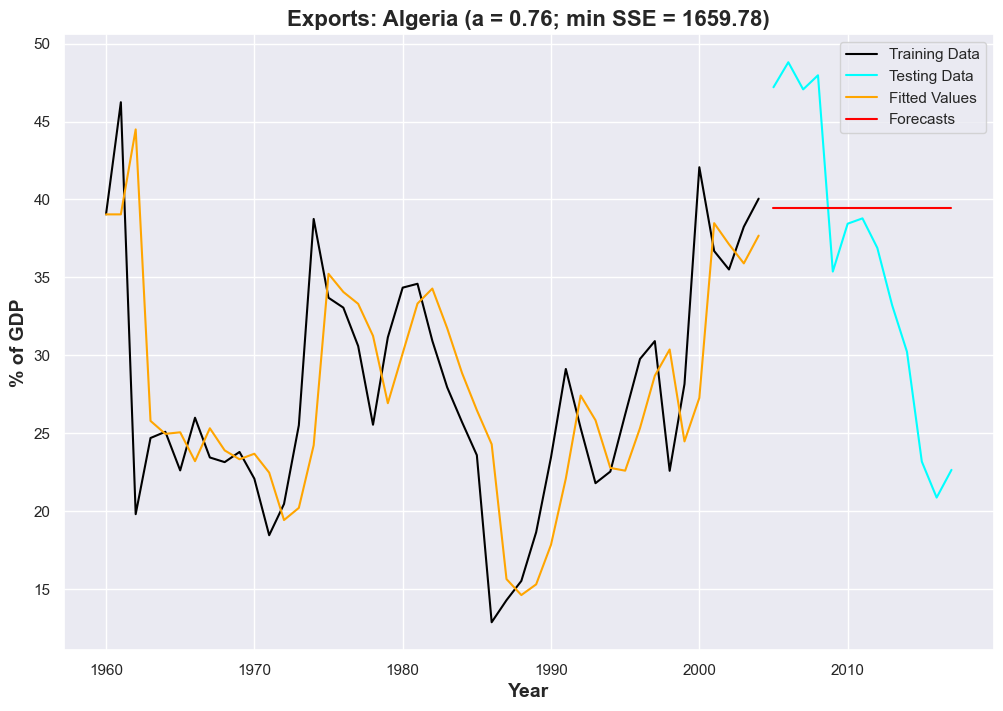

In [180]:
training_data["Exports"].plot(legend=True, label="Training Data", color="black")
testing_data["Exports"].plot(legend=True, label="Testing Data", figsize=(12, 8), color="cyan")
plt.plot(training_data.index, final_ses_model.fittedvalues, label="Fitted Values", color="orange")
forecast = final_ses_model.forecast(len(testing_data))
plt.plot(testing_data.index, forecast, label="Forecasts", color="red")
plt.grid(True)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('% of GDP', fontsize=14, fontweight='bold')
plt.title(f'Exports: Algeria (a = {optimal_alpha:.2f}; min SSE = {smallest_error:.2f})', fontsize=16, fontweight='bold')
plt.legend()
plt.show()
